# Proyecto: Análisis de mercado inmobiliario

El objetivo de este notebook es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real de análisis exploratorio de datos


### 1. Análisis Exploratorio de Datos

**Importamos las librerías necesarias para trabajar.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Imprimimos cuántas filas y columnas tiene, y sus cinco primeras instancias.**

In [2]:
df = pd.read_csv ("DS_Proyecto_01_Datos_Properati.csv")

In [3]:
df.columns
print ("El número de columnas es",len(df.columns))
df.index
print ("El número de filas es",len (df.index))

# Se utiliza df.columns y df.index para obtener el número de columnas y filas respectivamente.

El número de columnas es 19
El número de filas es 146660


In [4]:
df.head()

#df.head nos permite tener una visión de nuestro Dataset con las 5 primeras instancias.

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [5]:
df.columns

# Se imprimen los nombres de las columnas

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [6]:
faltantes_columna = df.isnull().sum()
print (faltantes_columna)

# Se imprimen los valores faltandes por columnas

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [7]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table (df)

# Esta función nos permite ordenar los valores de mayor a menor y saber que porcentaje representan
# los valores nulos en cada una de las columnas. 

,Total,Percent
surface_covered,21614,0.147375
surface_total,20527,0.139963
lon,9959,0.067905
lat,9925,0.067674
bathrooms,5957,0.040618
operation_type,0,0.000000
l3,0,0.000000
end_date,0,0.000000
created_on,0,0.000000
l1,0,0.000000


In [8]:
propiedades = df['property_type'].value_counts().index
print ("Existen",(len (propiedades)),"tipos de propiedades en el Dataset")
grupo_tipo = df.groupby ("property_type")
grupo_tipo.count ()

# Con df.groupby podemos ordenar nuestro data ser de acuerdo al tipo de propiedad y saber 
# cuantas instancias existen para cada tipo.

Existen 10 tipos de propiedades en el Dataset


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,operation_type
property_type,,,,,,,,,,,,,,,,,,
Casa,21521,21521,21521,20176,20162,21521,21521,21521,21521,21521,20184,16604,16656,21521,21521,21521,21521,21521
Casa de campo,322,322,322,305,305,322,322,322,322,322,301,258,258,322,322,322,322,322
Cochera,259,259,259,239,239,259,259,259,259,259,9,2,2,259,259,259,259,259
Departamento,107326,107326,107326,99501,99489,107326,107326,107326,107326,107326,104630,93749,93437,107326,107326,107326,107326,107326
Depósito,265,265,265,186,186,265,265,265,265,265,36,8,7,265,265,265,265,265
Local comercial,325,325,325,298,297,325,325,325,325,325,154,24,22,325,325,325,325,325
Lote,1312,1312,1312,1187,1187,1312,1312,1312,1312,1312,477,705,33,1312,1312,1312,1312,1312
Oficina,658,658,658,627,627,658,658,658,658,658,546,394,377,658,658,658,658,658
Otro,374,374,374,341,339,374,374,374,374,374,246,220,111,374,374,374,374,374


In [9]:
df ['property_type'].value_counts ()

# .value_counts nos permite tener un orden de mayor a menor de la cantidada total de instancias
# por cada tipo de propiedad

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

Text(0.5, 1.0, 'Número de instancias por cada tipo de propiedad')

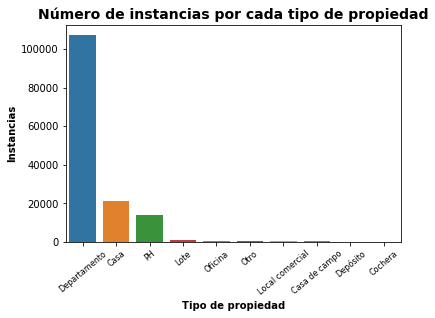

In [10]:
sns.countplot(data=df,x=df['property_type'],order = df['property_type'].value_counts().index)
plt.xticks(rotation=40,fontsize=8) # rotation permite modificar la leyenda del eje X permitiendo una mejor visualización.
plt.xlabel("Tipo de propiedad",fontweight='black')
plt.ylabel("Instancias",fontweight='black')
plt.title ("Número de instancias por cada tipo de propiedad",fontweight='black',fontsize=14)

# Gráfico de instancias por tipo de propiedad

Fig. 1: Número de instancias por cada tipo de propiedad, donde *departamento*, *casa* y *PH* 
son las de mayor número de publicaciones


Text(0.05, 0.05, 'Fig. 3: Distribución de las propiedades por Distritos de AMBA, donde se observa que el mayor número de propiedades se encuentra en Palermo')

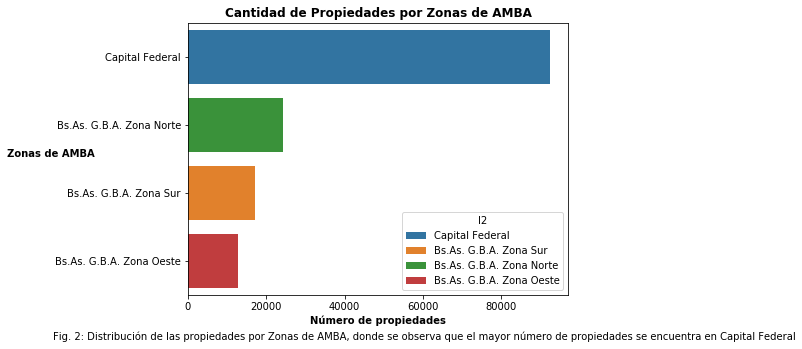

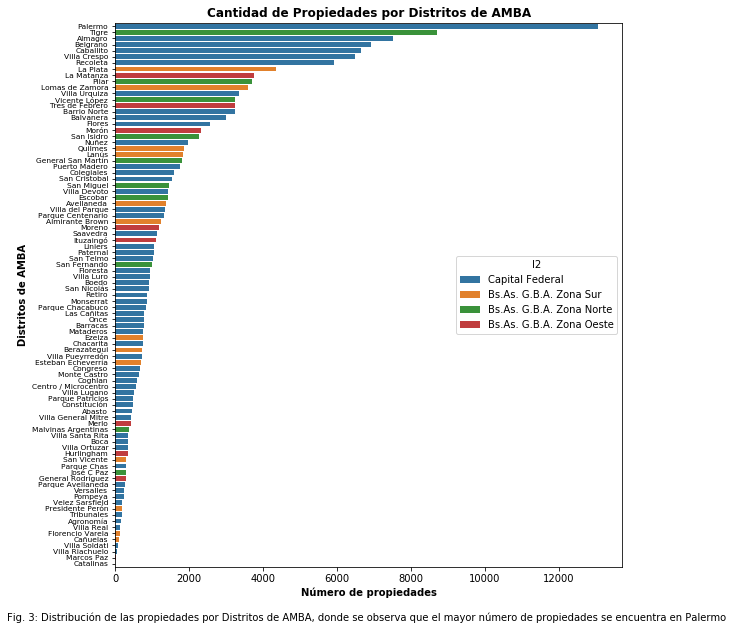

In [11]:
ax = plt.subplots(figsize=(15,5))
plt.subplot (1,2,1)
sns.countplot(data=df,y=df['l2'],order = df['l2'].value_counts().index,hue='l2',dodge=False) # hue permite mantener el mismo color para cada categoría en ambos gráficos
plt.title ("Cantidad de Propiedades por Zonas de AMBA",fontweight='black')
plt.xlabel ("Número de propiedades",fontweight='black')
plt.ylabel ("Zonas de AMBA",fontweight='black',rotation=0)
txt='Fig. 2: Distribución de las propiedades por Zonas de AMBA, donde se observa que el mayor número de propiedades se encuentra en Capital Federal'
plt.figtext (0,0,txt)

ax1 = plt.subplots(figsize=(20,10))
plt.subplot (1,2,1)
sns.countplot(data=df,y=df['l3'],order = df['l3'].value_counts().index,hue='l2',dodge=False) 
plt.title ("Cantidad de Propiedades por Distritos de AMBA",fontweight='black')
plt.xlabel ("Número de propiedades",fontweight='black')
plt.ylabel ("Distritos de AMBA",fontweight='black',rotation=90)
plt.yticks(fontsize=7.5)
txt='Fig. 3: Distribución de las propiedades por Distritos de AMBA, donde se observa que el mayor número de propiedades se encuentra en Palermo'
plt.figtext (0.05,0.05,txt)

# Gráfico de subplots para visualizar tipo de propiedad por región y tipo de propiedad de distrito
# de AMBA. En este caso se reemplazo el eje X por el eje Y para leer correctamente cada una de las
# regiones en la primer figura y los distritos en la segunda figura.

In [12]:
FL = df.copy()
FL = FL [(FL.property_type == 'Departamento')|(FL.property_type == 'Casa')|(FL.property_type == 'PH')]
FL = FL [(FL.l2 == 'Capital Federal')]
FL.shape

# Se realiza el filtrado del dataset por tipo de propiedad, en este caso 'Departamente', 'Casa' y 'PH'
# con todas aquellas propiedades ubicadas solamente en 'Capital Federal'

(91485, 19)

In [13]:
FL.shape
print ("CHECKPOINT :",FL.shape)

CHECKPOINT : (91485, 19)


**CHECKPOINT 91485 instancias, 19 columnas**

In [14]:
FL.describe() 
# Valores estadísticos de nuestro dataset filtrado. Se observa en las columnas de 'rooms'
# 'bedrooms' y 'bathrooms' valores máximos que podríamos considerar outliers. En 'surface_total'
# y 'surface_covered' vemos valores muy pequeños que los podemos considerar como errores en el 
# ingreso de datos.

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [15]:
FL.drop(['created_on','start_date','end_date','lat','lon','title','description','operation_type','l1',
        'currency'], axis='columns', inplace=True)

In [16]:
# Uso de Z-score para eliminar los outliers
valor_medio = FL.mean()
std = FL.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std

In [17]:
Departamentos = FL [(FL.property_type == 'Departamento')]
Departamentos = Departamentos[['property_type','surface_total']]
PH = FL [(FL.property_type == 'PH')]
PH = PH [['property_type','surface_total']]
Casa = FL [(FL.property_type == 'Casa')]
Casa = Casa [['property_type','surface_total']]

(0, 1000)

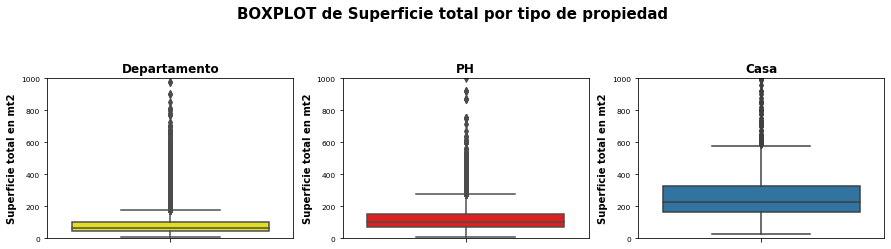

In [18]:
plt.figure (figsize=(15,10))
plt.suptitle ("BOXPLOT de Superficie total por tipo de propiedad",fontsize=15,fontweight='black')

plt.subplot (3,3,1)
sns.boxplot(data=Departamentos,y='surface_total', color='yellow')
plt.yticks(fontsize=7.5)
plt.ylabel ("Superficie total en mt2",fontweight='black')
plt.title ("Departamento",fontweight='black')
plt.ylim (0,1000)

plt.subplot (3,3,2)
sns.boxplot(data=PH,y='surface_total',color='red')
plt.yticks(fontsize=7.5)
plt.ylabel ("Superficie total en mt2",fontweight='black')
plt.title ("PH",fontweight='black')
plt.ylim (0,1000)

plt.subplot (3,3,3)
sns.boxplot(data=Casa,y='surface_total')
plt.yticks(fontsize=7.5)
plt.ylabel ("Superficie total en mt2",fontweight='black')
plt.title ("Casa",fontweight='black')
plt.ylim (0,1000)

Fig. 4: Superficie total por cada tipo de propiedad donde se observa que las casas son las de 
    mayor superficie.

In [19]:
FL = FL [(FL.surface_total >= FL.surface_covered)]
# Filtrado de instancias con solo aquellas cuyo surface_total es mayor a surface_covered

In [20]:
Departamentos = df [(df.property_type == 'Departamento')]
Departamentos = Departamentos[['property_type','rooms','bedrooms','bathrooms']]
PH = df [(df.property_type == 'PH')]
PH = PH[['property_type','rooms','bedrooms','bathrooms']]
Casa = df [(df.property_type == 'Casa')]
Casa = Casa[['property_type','rooms','bedrooms','bathrooms']]

Text(0, 0, 'Fig. 5: Se observa la distribución de ambientes, baños y dormitorios por tipo de propieedad')

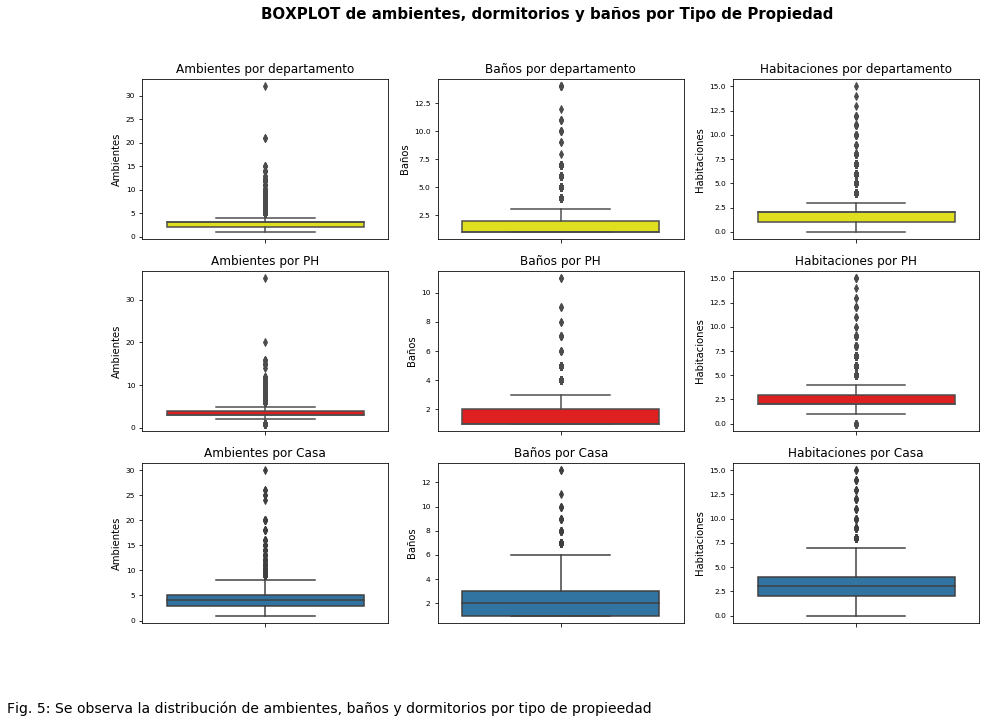

In [21]:
# En la siguiente figura se analiza la distribución de los distintos ambientes de acuerdo
# al tipo de propiedad en un análisis por separado de cada una.

plt.figure (figsize=(15,10))
plt.suptitle ("BOXPLOT de ambientes, dormitorios y baños por Tipo de Propiedad",fontsize=15,fontweight='black')


plt.subplot (3,3,1)
plt.title ("Ambientes por departamento")
sns.boxplot(data=Departamentos,y='rooms',color='yellow')
plt.yticks(fontsize=7.5)
plt.ylabel ("Ambientes")

plt.subplot (3,3,2)
plt.title ("Baños por departamento")
sns.boxplot(data=Departamentos,y='bathrooms',color='yellow')
plt.yticks(fontsize=7.5)
plt.ylabel ("Baños")

plt.subplot (3,3,3)
plt.title ("Habitaciones por departamento")
sns.boxplot (data=Departamentos,y='bedrooms',color='yellow')
plt.yticks(fontsize=7.5)
plt.ylabel ("Habitaciones")

plt.subplot (3,3,4)
plt.title ("Ambientes por PH")
sns.boxplot(data=PH,y='rooms',color='red')
plt.yticks(fontsize=7.5)
plt.ylabel ("Ambientes")

plt.subplot (3,3,5)
plt.title ("Baños por PH")
sns.boxplot(data=PH,y='bathrooms',color='red')
plt.yticks(fontsize=7.5)
plt.ylabel ("Baños")

plt.subplot (3,3,6)  
plt.title ("Habitaciones por PH")
sns.boxplot (data=PH,y='bedrooms',color='red')
plt.yticks(fontsize=7.5)
plt.ylabel ("Habitaciones")

plt.subplot (3,3,7)
plt.title ("Ambientes por Casa")
sns.boxplot(data=Casa,y='rooms')
plt.yticks(fontsize=7.5)
plt.ylabel ("Ambientes")

plt.subplot (3,3,8)
plt.title ("Baños por Casa")
sns.boxplot(data=Casa,y='bathrooms')
plt.yticks(fontsize=7.5)
plt.ylabel ("Baños")

plt.subplot (3,3,9)  
plt.title ("Habitaciones por Casa")
sns.boxplot (data=Casa,y='bedrooms')
plt.yticks(fontsize=7.5)
plt.ylabel ("Habitaciones")

txt='Fig. 5: Se observa la distribución de ambientes, baños y dormitorios por tipo de propieedad'
plt.figtext (0,0,txt,fontsize=14)

*En la figura superior se observa como la distribución es similar en la cantidad de baños, habitaciones y ambientes en los departamentos y PH, siendo un poco superior en la propiedades tipo casa.*

In [22]:
Departamentos = df [(df.property_type == 'Departamento')]
Departamentos = Departamentos[['property_type','price']]
PH = df [(df.property_type == 'PH')]
PH = PH[['property_type','price']]
Casa = df [(df.property_type == 'Casa')]
Casa = Casa[['property_type','price']]

Text(0, 0, 'Fig. 6: Comparativa de los valores de las propiedades separado por tipo.')

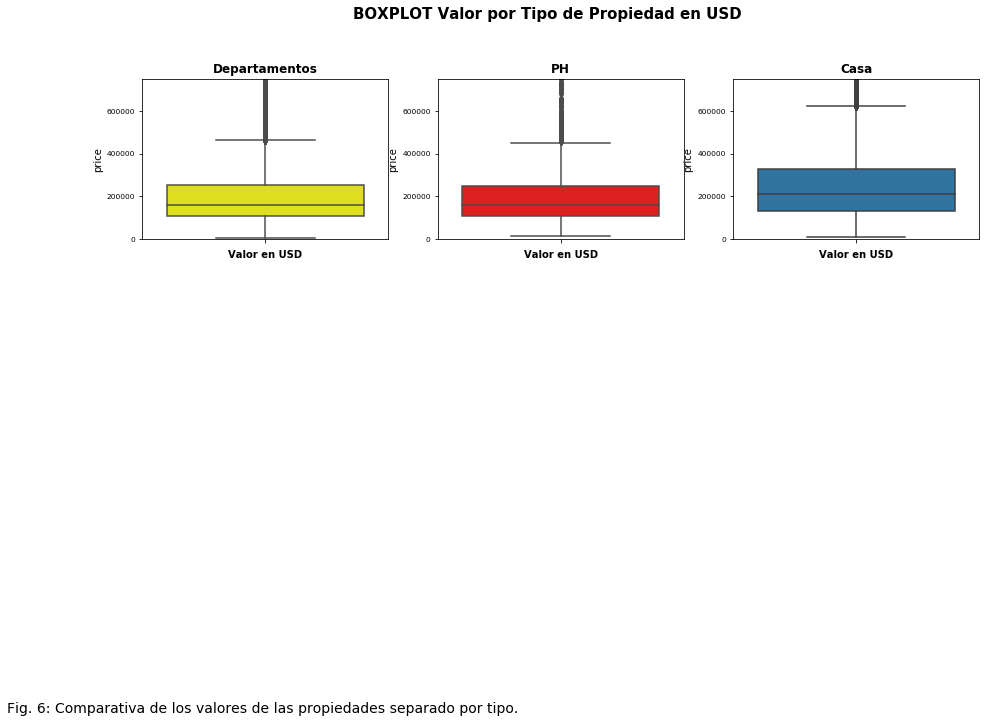

In [23]:
plt.figure (figsize=(15,10))
plt.suptitle ("BOXPLOT Valor por Tipo de Propiedad en USD",fontsize=15,fontweight='black')

plt.subplot (3,3,1)
plt.title ("Departamentos",fontweight='black')
sns.boxplot(data=Departamentos,y='price',color='yellow')
plt.yticks(fontsize=7.5)
plt.xlabel ("Valor en USD",fontweight='black')
plt.ylim(0,750000)

plt.subplot (3,3,2)
plt.title ("PH",fontweight='black')
sns.boxplot(data=PH,y='price',color='red')
plt.yticks(fontsize=7.5)
plt.xlabel ("Valor en USD",fontweight='black')
plt.ylim(0,750000)

plt.subplot (3,3,3)
plt.title ("Casa",fontweight='black')
sns.boxplot(data=Casa,y='price')
plt.yticks(fontsize=7.5)
plt.xlabel ("Valor en USD",fontweight='black')
plt.ylim(0,750000)

txt='Fig. 6: Comparativa de los valores de las propiedades separado por tipo.'
plt.figtext (0,0,txt,fontsize=14)

In [24]:
FL = df.copy()
FL = FL [(FL.property_type == 'Departamento')|(FL.property_type == 'Casa')|(FL.property_type == 'PH')]
FL = FL [(FL.l2 == 'Capital Federal')]
FL.drop(['created_on','start_date','end_date','lat','lon','title','description','operation_type','l1',
            'currency','l2','l3'], axis='columns', inplace=True)

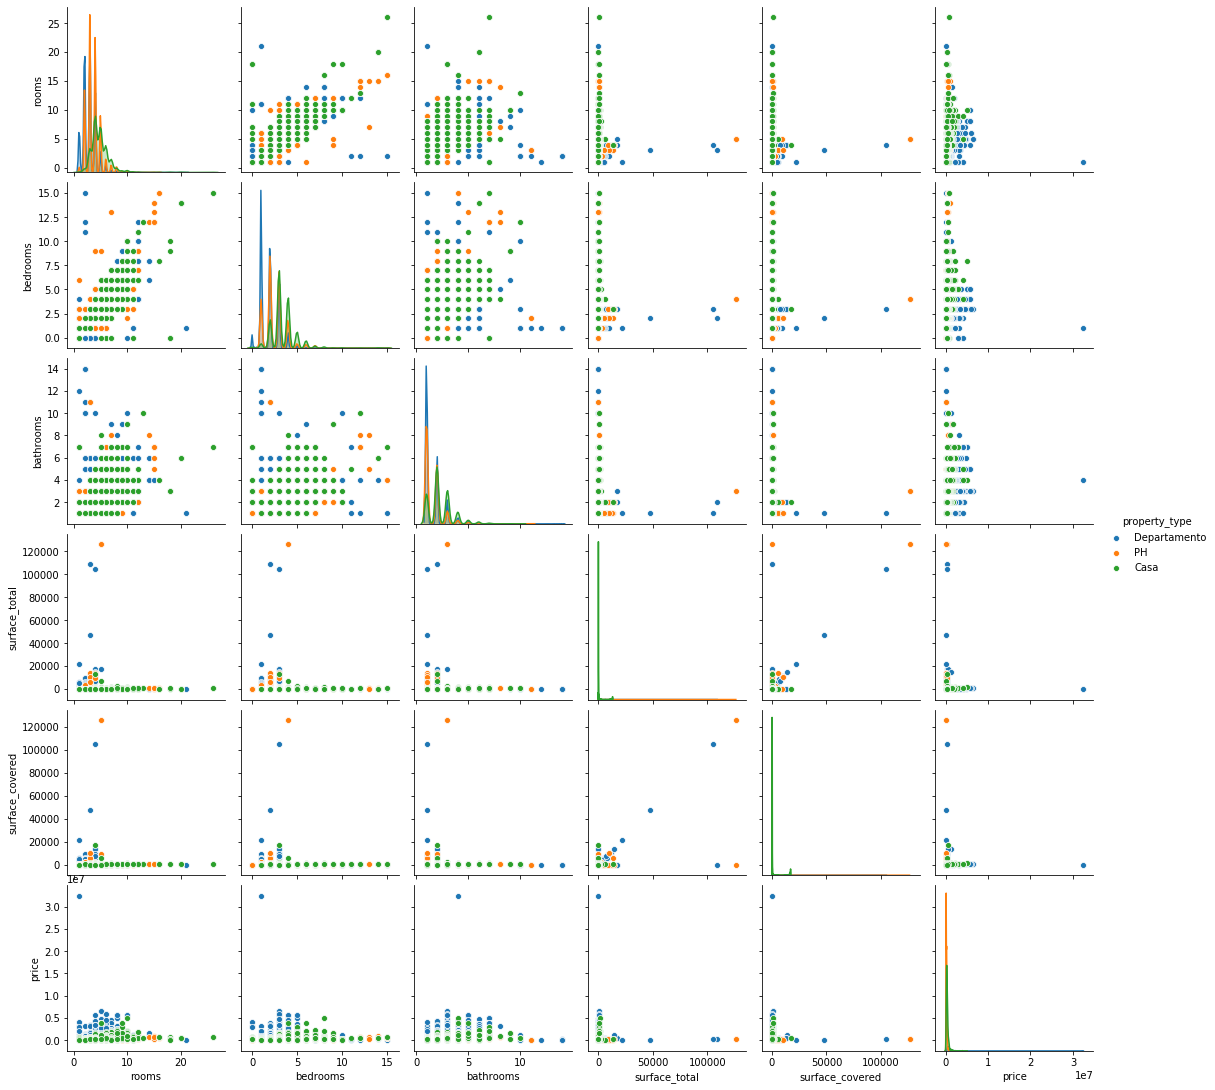

In [25]:
sns.pairplot (FL,hue='property_type')

Fig. 7: Se observa las relaciones entre las diversas variables entre sí divididos
por el tipo de propiedad

In [26]:
FL_depto = df.copy()
FL_depto = FL_depto [(FL_depto.property_type == 'Departamento')]
FL_depto = FL_depto [(FL_depto.l2 == 'Capital Federal')]
FL_depto.drop(['created_on','start_date','end_date','lat','lon','title','description','operation_type','l1',
            'currency','l2','property_type'], axis='columns', inplace=True)

FL_PH = df.copy()
FL_PH = FL_PH [(FL_PH.property_type == 'PH')]
FL_PH = FL_PH [(FL_PH.l2 == 'Capital Federal')]
FL_PH.drop(['created_on','start_date','end_date','lat','lon','title','description','operation_type','l1',
            'currency','l2','property_type'], axis='columns', inplace=True)

FL_Casa = df.copy()
FL_Casa = FL_Casa [(FL_Casa.property_type == 'Casa')]
FL_Casa = FL_Casa [(FL_Casa.l2 == 'Capital Federal')]
FL_Casa.drop(['created_on','start_date','end_date','lat','lon','title','description','operation_type','l1',
            'currency','l2','property_type'], axis='columns', inplace=True)

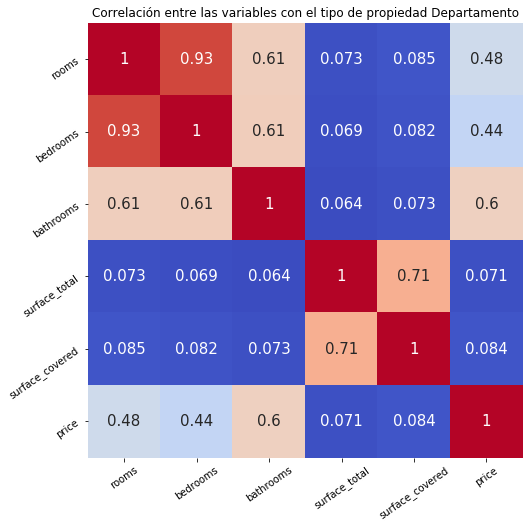

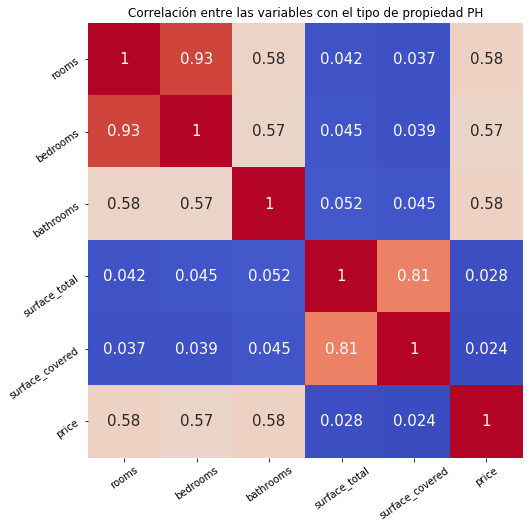

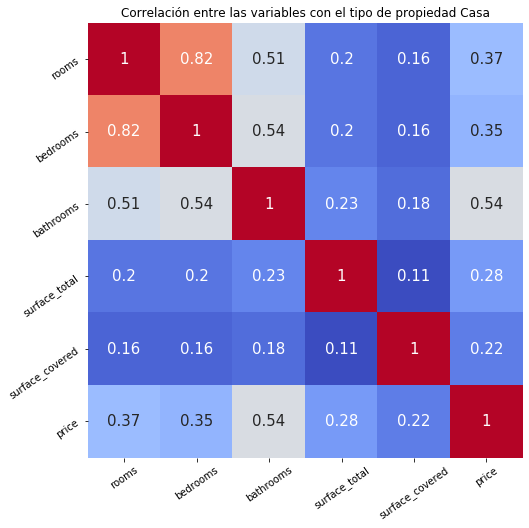

In [27]:
corr = FL_depto.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = False,  square = True, annot=True,annot_kws={'size': 15},
           xticklabels= FL_depto.drop(columns = 'l3').columns, 
           yticklabels= FL_depto.drop(columns = 'l3').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 35)
plt.yticks(rotation = 35)
plt.title ("Correlación entre las variables con el tipo de propiedad Departamento")
plt.show()

corr = FL_PH.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = False,  square = True, annot=True,annot_kws={'size': 15},
           xticklabels= FL_PH.drop(columns = 'l3').columns, 
           yticklabels= FL_PH.drop(columns = 'l3').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 35)
plt.yticks(rotation = 35)
plt.title ("Correlación entre las variables con el tipo de propiedad PH")
plt.show()

corr = FL_Casa.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = False,  square = True, annot=True,annot_kws={'size': 15},
           xticklabels= FL_Casa.drop(columns = 'l3').columns, 
           yticklabels= FL_Casa.drop(columns = 'l3').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 35)
plt.yticks(rotation = 35)
plt.title ("Correlación entre las variables con el tipo de propiedad Casa")
plt.show()

Fig. 8: en el mapa de calor de correlación se observa que el valor tiene relación con el número de 
    habitaciones y baños en el PH. En el caso de las casay los departamentos, el valor de la propiedad 
    tiene relación con el número total de baños de la propiedad.


### 2 Desafío

¿Cuál es el barrio más caro de Buenos Aires? 

In [28]:
desafio = df.copy()

In [29]:
propiedades = desafio [(desafio.property_type == 'Departamento')|(desafio.property_type == 'Casa')|(desafio.property_type == 'PH')]
desafio = desafio [(desafio.surface_total >= desafio.surface_covered)]
desafio = desafio.dropna()

Text(0.5, 1.0, 'Valor del metro cuadrado de acuerdo a la ubicación')

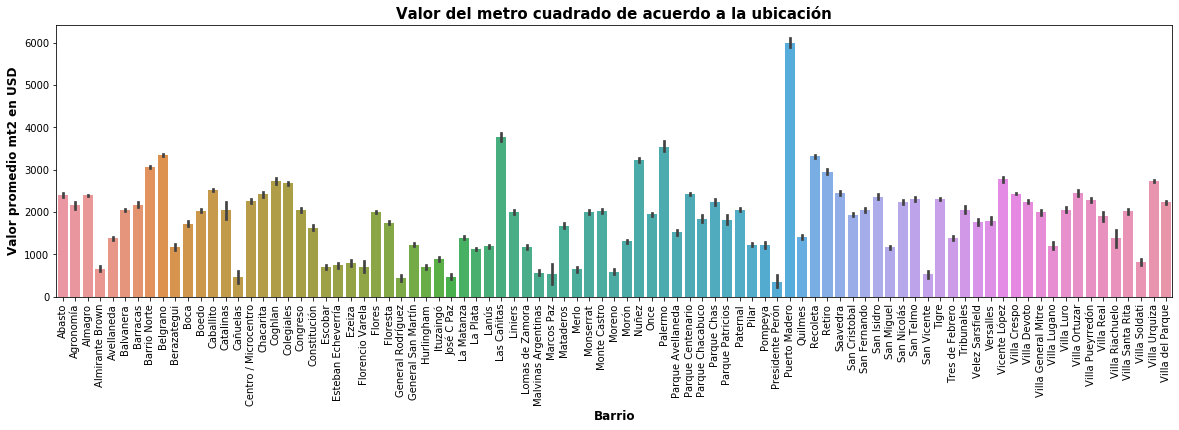

In [30]:
desafio ['valor_mt2'] = desafio ['price'] / desafio ['surface_total']
orden = desafio.groupby(["l3"])["valor_mt2"].aggregate(np.mean).reset_index()
plt.figure (figsize = (20,5))
sns.barplot (desafio.l3,desafio.valor_mt2,order=orden["l3"])
plt.xticks (rotation = 90)
plt.xlabel ('Barrio',fontweight='black',fontsize = 12)
plt.ylabel ('Valor promedio mt2 en USD',fontweight='black',fontsize = 12)
plt.title ('Valor del metro cuadrado de acuerdo a la ubicación',fontweight='black',fontsize = 15)

Fig. 9 : Histograma que divide los barrios de acuerdo al valor por metro cuadrado de las propiedades.

*Según el análisis del dataset el barrio mas caro del Área Metropolitana de Buenos Aires es Puerto Madero, 
determinado por el valor por metro cuadrado total. Se toman los valores de la columna del metro total que considera
los espacios comunes o los espacios al aire libre que puede tener la propiedad. A partir de la pandemia 
COVID-19, lo que el cliente puede comenzar a buscar es mas espacios abiertos y no tanto la superficie cubierta
que puede tener el departamento. Si,y por el mismo motivo, necesitamos información complementaria. Por ejemplo, 
saber si tengo espacios de recreación alrededor (plazas, parques, clubes) o si la zona tiene algún colegio 
cerca, o si queda cerca de mi trabajo, lo cual me permita evitar los grandes traslados.*

### 3. Machine Learning

En esta sección, entrenamos dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Solo vamos a tener en cuenta que:

1. Seleccionamos aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Seleccionamos aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Seleccionamos aquellas propiedades cuya precio es menor 4000000 dólares.
1. Seleccionamos las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descartamos aquellas instacias con valores faltantes.

In [31]:
df = pd.read_csv ("DS_Proyecto_01_Datos_Properati.csv")

In [32]:
machine_learning = df.copy()

In [33]:
machine_learning = machine_learning [(machine_learning.property_type == 'Departamento')|(machine_learning.property_type == 'Casa')|(machine_learning.property_type == 'PH')]
machine_learning = machine_learning [(machine_learning.surface_total >= 15)] 
machine_learning = machine_learning [(machine_learning.surface_total <= 1000)]
machine_learning = machine_learning [(machine_learning.price <= 4000000)]
machine_learning = machine_learning [(machine_learning.l2 == 'Capital Federal')]
machine_learning.drop(['created_on','start_date','end_date','lat','lon','title','description','operation_type','l1',
            'currency','l3','l2','property_type'], axis='columns', inplace=True)
machine_learning = machine_learning.dropna()

In [34]:
machine_learning.shape

(81019, 6)

**Elegimos una métrica apropiada para evaluar los resultados de los modelos.**

*En este trabajo debemos predecir valores continuos, en este caso el precio de una propiedad. Si tuviésemos en el dataset la categoría de cada propiedad podríamos usar un clasificador. Para ello la métrica para evaluar el resultado de nuestro modelos en un regresión, es el RMSE (root mean square error)*

*RMSE es la métrica predeterminada de muchos modelos porque la función de pérdida que se define en términos de RMSE es fácilmente diferenciable y facilita la realización de operaciones matemáticas,sobre todo en este caso que nos interesa la precisión de la predicción. Es computacionalmente simple, fácilmente diferenciable y está presente como métrica predeterminada para la mayoría de los modelos.*

*Utilizó también el R2 cuadrado. En estadística, el coeficiente de determinación, denominado R² es un estadístico usado en el contexto de un modelo estadístico cuyo principal propósito es predecir futuros resultados o probar una hipótesis.*

**Estas métricas son métricas de error, a más bajo RMSE, mejor regresor.**

**El valor R2 varía entre 1 y 0. Mientras más cercano a 1, mayor precisión del modelo, aunque también puede ser negativo porque el modelo puede ser arbitrariamente peor.**

**Seleccionar las *variables predictoras (`X`)* y la *variable a predecir (`y`)*.**

In [35]:
X = machine_learning [['rooms','bedrooms','bathrooms','surface_total','surface_covered']]
y = machine_learning [['price']]

**Realizar un *Train/Test split* de los datos.**

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Tamaño de Base:", machine_learning.shape)
print("Tamaño de Muestra de Entrenamiento:", X_train.shape)
print("Tamaño de Muestra de Testeo", X_test.shape)
print("Tamaño del Target de Entrenamiento:", y_train.shape)
print("Tamaño del Target de Testeo", y_test.shape)

Tamaño de Base: (81019, 6)
Tamaño de Muestra de Entrenamiento: (56713, 5)
Tamaño de Muestra de Testeo (24306, 5)
Tamaño del Target de Entrenamiento: (56713, 1)
Tamaño del Target de Testeo (24306, 1)


**Generar modelo *benchmark* y evaluarlo**

*La regresión lineal suele ser el Benchmark de muchos problemas de regresión.*

In [37]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [38]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(linear_model.coef_, linear_model.intercept_)

[[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
   1.07004571e+02]] [-56646.24807941]


In [40]:
print('Precisión del modelo (R2):')
print(linear_model.score(X_train, y_train))

Precisión del modelo (R2):
0.5517887107017188


Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567


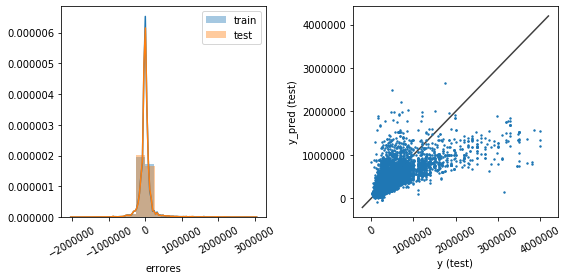

In [41]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal']

for i, model in enumerate([linear_model]):
    y_train_pred = linear_model.predict(X_train)
    y_test_pred = linear_model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.xticks (rotation=30)
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.xticks (rotation=30)
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.**

<font color='green'>**VECINOS MAS CERCANOS**</font>

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [43]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [44]:
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

In [45]:
print('Score R2:')
print(knn_regressor.score(X_train, y_train))

Score R2:
0.8337576939918325


**Evaluamos los modelos obtenidos. Para ello, evaluamos la métrica elegida en el conjunto de Test y en el conjunto de Train. También, vamos a graficar los valores reales vs. valores predichos.**

In [46]:
# Definimos las listas vacias para los valores de R2 deseados
r2_score = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor (n_neighbors=k)   
    # Entrenar el modelo
    knn_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn_regressor.predict(X_train)
    y_test_pred = knn_regressor.predict(X_test)
    
    # Predecir y evaluar sobre el set de evaluación
    score = knn_regressor.score(X_train, y_train)
    
    # Agregar la información a las listas
    r2_score.append(score)

Text(0.5, 1.0, 'Relación entre el número de vecinos y su R2')

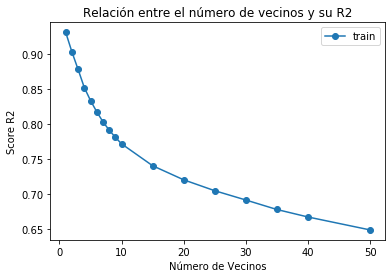

In [47]:
plt.plot(k_vecinos,r2_score,'o-',label='train' )
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Score R2')
plt.title('Relación entre el número de vecinos y su R2')

*Fig. 10 A menor número de KNN, el score R2 es más preciso.*

In [48]:
y_train_pred = y_train_pred.reshape (56713,1)
y_test_pred = y_test_pred.reshape (24306,1)

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 176265.36360904493
Raíz del error cuadrático medio en Test: 183792.61746099347


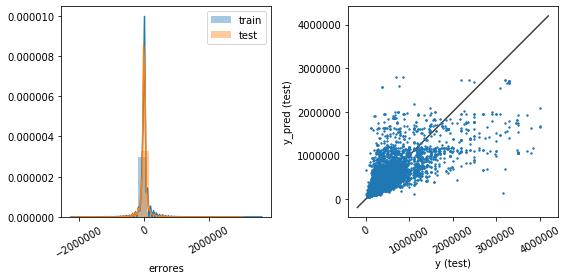

In [49]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Vecinos más cercanos']

for i, model in enumerate([knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = y_train_pred.reshape (56713,1)
    y_test_pred = y_test_pred.reshape (24306,1)
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xticks (rotation=30)
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.xticks (rotation=30)
        

    plt.tight_layout()
    plt.show()

*En el modelo KNN de regresión, observamos que al entrenar nuestro modelo y empezar con un valor 5 de nuestra elección, obtenemos resultados en el R2 de un 0.64 que esta un poco por encima de nuestro modelo benchmark. Al comparar nuestro modelo con otros valores vemos en las gráficas que al disminuir el número de vecinos, los resultados de nuestro modelo mejoran, por lo que deberíamos trabajar con un knn de 1 a 3 para obtener buenos resultados. Los resultados de nuestra RSME entre el test y el train son bastantes similares entre ellos.*

<font color='green'>**ARBOL DE REGRESION**</font>

In [50]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

In [51]:
tree_regressor = DecisionTreeRegressor(max_depth = 3)

In [52]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [53]:
y_pred = tree_regressor.predict(X_test)

In [54]:
print('Score R2:')
print(tree_regressor.score(X_train, y_train))

Score R2:
0.5844333913686437


**Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realizamos gráficos de valores reales vs. valores predichos.**

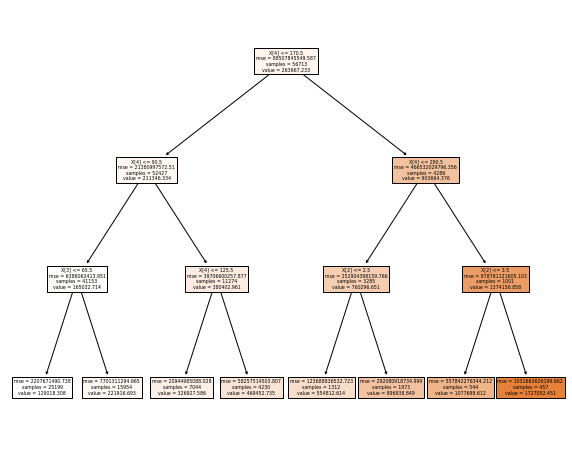

In [55]:
from sklearn import tree
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

In [56]:
# Definimos las listas vacias para los valores de R2 deseados
r2_score_arbol = []

# Definimos la profunidad del arbol que vamos a explorar
max_depth = [1,2,3,4,5,6,7,8,9,10]

# Generamos en loop sobre los distintos valores de arbol
for i in max_depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    tree_regressor = DecisionTreeRegressor(max_depth = i)
    # Entrenar el modelo
    tree_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_pred = tree_regressor.predict(X_test)
    
    # Predecir y evaluar sobre el set de evaluación
    score_arbol = tree_regressor.score(X_train, y_train)
    
    # Agregar la información a las listas
    r2_score_arbol.append(score_arbol)

Text(0.5, 1.0, 'Relación entre ela profundidad del árbol y su R2')

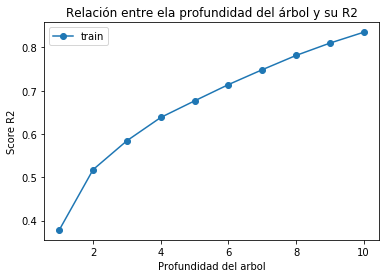

In [57]:
plt.plot(max_depth,r2_score_arbol,'o-',label='train' )
plt.legend()
plt.xlabel('Profundidad del arbol')
plt.ylabel('Score R2')
plt.title('Relación entre ela profundidad del árbol y su R2')

*Fig. 11 A mayor profundidad del árbol, el score R2 es más preciso.*

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 153867.5126534829


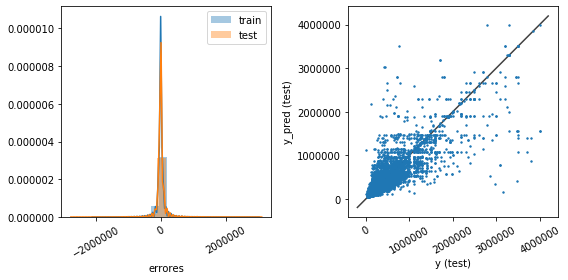

In [58]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Árbol de Decisión']

for i, model in enumerate([tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = y_train_pred.reshape (56713,1)
    y_test_pred = y_test_pred.reshape (24306,1)
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.xticks (rotation=30)
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.xticks (rotation=30)
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

*En el modelo árbol de regresión, observamos que al entrenar nuestro modelo y empezar con un valor 3 en la profundidad del árbol, obtenemos resultados en el R2 de un 0.58 que también resulta estar un poco por encima de nuestro modelo benchmark. Al comparar nuestro modelo con otros valores max depth vemos en las gráficas que al aumentar el número en la profundidad del árbol, los resultados de nuestro modelo mejoran, pero probablemente un árbol muy profundo dificulte su visualización, además de no tener la misma precisión del KNN. Los resultados de nuestra RSME entre el test y el train son bastantes similares entre ellos.*

*Comparación del RMSE de los tres modelos.*

Modelo: Regresión Lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567


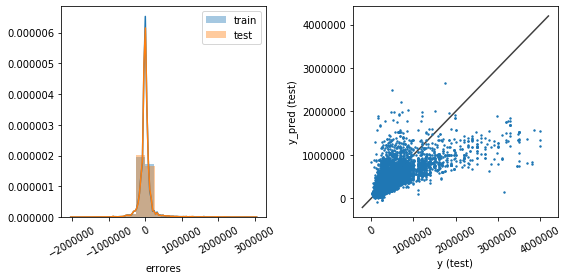

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 153867.5126534829


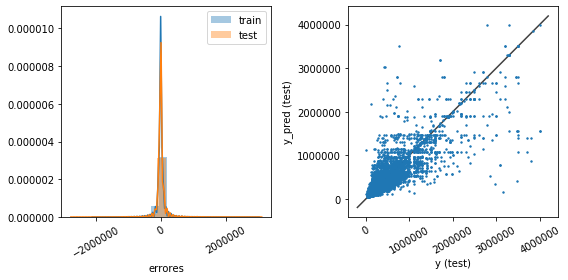

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 176265.36360904493
Raíz del error cuadrático medio en Test: 183792.61746099347


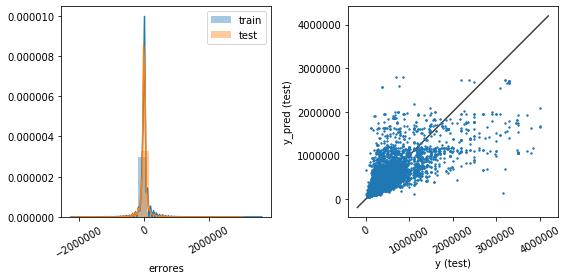

In [59]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión Lineal','Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = y_train_pred.reshape (56713,1)
    y_test_pred = y_test_pred.reshape (24306,1)
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xticks (rotation=30)
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.xticks (rotation=30)
        

    plt.tight_layout()
    plt.show()

*Comparando el resultado de ambos modeloselegiría para una estimación de un valor de la propiedada sería el de vecinos mas cercanos (KNN). Si bien ambos modelos son muy similares, la ventaja del KNN es que al funcionar por analogía, buscando las instancias mas parecidas y devuelve un resultado aprendido a partir de nuestro datos iniciales, lo que tiene como desventaje un trabajo computacional alto.*